# Step1: Scrape Tweets

### Use Tweepy API to search tweets. Only return a few days' tweets due to Twitter API limitations

In [51]:
import tweepy

In [52]:
# Specify the account credentials in the following variables:
consumer_key = '6LH2LIMPGNWMxNE2a6LfILp7i'
consumer_secret = '0eWTMNdazgVNCgt1lRCQapeN8O54GeonyGHREyebYQs7dL3upn'
access_token = '78610351-PaQIZu59zNjgIX7OeaKlU1Jr9LMqCTxVmGa7vxLZM'
access_token_secret = 'J32gDj3Vdi3bjB0IbisO0IoCKWadDogVeGgZSyv510jZ4'


# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) # 'wait on rate limit' is to avoid request failure

In [53]:
con=0
for tweet in tweepy.Cursor(api.search, q={"#ao"}, count=10,
                           lang="en", since="2018-03-10").items():
    con+=1
    print("\n-----\n"+str(con)+"\n"+str(tweet.created_at), tweet.text+ "\n-----\n")
    with open('currys.txt','a',encoding="utf-8") as f:
        f.write(tweet.text)
        f.write('\n')

###Use GetOldTweets3, a tool developed by some random guy in github, we can get old tweets. But much slower.

In [55]:
#pip install GetOldTweets3
import GetOldTweets3 as got

C:\anaconda3\lib\site-packages\lxml\html\_setmixin.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableSet


In [57]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#ao')\
                                           .setSince("2017-03-10")\
                                           .setUntil("2019-03-10")\
                                           .setMaxTweets(10000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)[0]
print(tweet.text)

おはようございます 今日もよろしくお願いします #ao #rak #豊中ヘアサロン #豊中美容室 #髪質改善サロン #髪質改善トリートメント #トリートメントショット #大人女子 #メンズカット #ホットペッパービューティーhttp://beauty.hotpepper.jp/smartphone/slnH000181196/ …


In [ ]:
for i in range(10000):
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)[i]
    print(i)
    with open('currys.txt','a',encoding="utf-8") as f:
        f.write(tweet.text)
        f.write('\n')

### Use Selenium to get tweets. Still slow because we have to wait for loading.

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

The url below is the most relevant one I found

In [ ]:
# launch the browser
browser = webdriver.Chrome()
url = u'https://twitter.com/search?f=tweets&vertical=default&q=%23currys&src=typd'
browser = webdriver.Chrome()
browser.get(url)

# Let the Tweets load
time.sleep(1)

# Find the body of the HTML page
body = browser.find_element_by_tag_name('body')

# Keep scrolling down using a simulation of the PAGE_DOWN button
for _ in range(2000):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)

# Get the tweets by their class (similar to Beautifulsoup's find())
tweets = browser.find_elements_by_class_name('tweet-text')
# Print Tweets
count=0
for tweet in tweets:
    count+=1
    print(count)
    with open('currys.txt','a',encoding="utf-8") as f:
        f.write(tweet.text)
        f.write('\n')

# Step 2: Frequency analysis, wordcloud

In [15]:
import nltk
import re
import wordcloud as WordCloud
#from wordcloud import WordCloud

In [17]:
# treat the text as bag of words
with open('currys.txt','r',encoding='utf-8') as f:
    currys=f.read()

Clean the data -- url, non-English character

In [18]:
# clean url
currys_clean = re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", currys)             

In [19]:
# clean non-English characters
currys_clean1 = re.sub('[^A-Za-z]',' ',currys_clean)

In [20]:
# create stopwords list for this case, keep updating according to output
stopword_freq=["I","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
           "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
           "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
           "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
           "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
           "being", "have", "has", "had", "having", "do", "does", "did", "doing", 
           "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
           "of", "at", "by", "for", "with", "about", "against", "between", "into",
           "through", "during", "before", "after", "above", "below", "to", "from",
           "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", 
           "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
           "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
           "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
           "will", "just", "don", "should", "now",'via']

Check word frequency

In [21]:
# tokenize
tokens = nltk.word_tokenize(currys_clean1)
print(tokens)

['JBL', 'XTREME', 'Portable', 'Bluetooth', 'Wireless', 'Speaker', 'Camouflage', 'at', 'Currys', 'PC', 'World', 'lduk', 'via', 'LatestDealsUK', 'SAVE', 'ACER', 'Aspire', 'Intel', 'Core', 'I', 'Laptop', 'TB', 'HDD', 'Silver', 'at', 'Currys', 'PC', 'World', 'lduk', 'via', 'LatestDealsUK', 'TeamKnowhowUK', 'is', 'anybody', 'going', 'to', 'have', 'the', 'decency', 'to', 'speak', 'to', 'me', 'tonight', 're', 'yr', 'nd', 'cock', 'up', 'and', 'my', 'nd', 'complaint', 'or', 'how', 'else', 'will', 'I', 'know', 'what', 'is', 'happening', 'at', 'am', 'tomorrow', 'Absolute', 'disgrace', 'currys', 'PANASONIC', 'Wireless', 'Voice', 'Controlled', 'Speaker', 'with', 'Google', 'Assistant', 'Built', 'In', 'at', 'Currys', 'PC', 'World', 'lduk', 'via', 'LatestDealsUK', 'RT', 'LivingSafely', 'Currys', 'recalls', 'this', 'March', 'More', 'recalls', 'LENOVO', 'Ideapad', 'AMD', 'A', 'Laptop', 'GB', 'SSD', 'at', 'Least', 'Trade', 'In', 'at', 'Currys', 'PC', 'World', 'lduk', 'via', 'LatestDealsUK', 'Took', 'my',

In [22]:
# remove stop words
filtered_words = [word for word in tokens if word not in stopword_freq]

In [23]:
# display the most frequent 25 words that has more than 1 letter
freq_words=nltk.FreqDist(w.lower() for w in filtered_words if len(w)>1)
print(freq_words.most_common(25))

[('currys', 4361), ('pc', 1831), ('world', 1599), ('latestdealsuk', 1329), ('lduk', 1328), ('curryspcworld', 676), ('tv', 535), ('pcworld', 505), ('smart', 462), ('get', 383), ('appliances', 309), ('kitchen', 307), ('price', 301), ('free', 296), ('delivery', 283), ('promocode', 278), ('black', 277), ('service', 277), ('from', 273), ('entertainment', 255), ('cameras', 252), ('tech', 247), ('ireland', 244), ('london', 242), ('accessories', 234)]


Create word cloud

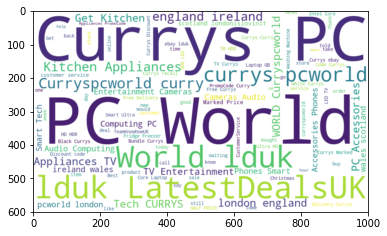

In [48]:
#function.name
wc = wordcloud.WordCloud( width=1000, height=600, margin=2, background_color="white", max_words=100, stopwords=stopword_freq)
wc.generate(currys_clean1)
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")



# Step 3: Topic Modelling 

In [31]:
# treat the text as list for different reviews
with open('currys.txt','r',encoding='utf-8') as f:
    currys=f.readlines()

In [32]:
# clean each review
currys_clean=[]
for review in currys:
    reivew=re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", review)
    review=re.sub('[^A-Za-z]',' ',review)
    currys_clean.append(review)

In [33]:
# create stopwords for topic modelling, keep updating according to output 
# (compared to stopwords for frequency analysis, this list adds a lot of adjectives)
stopword_topic=['few', 'want', 'be', 'itself', 'we', 'here', 'so', 'wha', 'their', 'let',
            'yer', 'they', 'have', 'iep', 'didn', 'should', 'yay', 'his', 'I', 'doing',
            'or', 'only', 'an', 'same', 'going', 'yourselves', 'above', 'some', 'thank',
            'will', 'against', 'off', 'having', 'very', 'thanks', 'than', 'and', 'under',
            'more', 'with', 'no', 'get', 'when', 'ours', 'other', 't', 'most', 'my',
            'awesome', 'being', 'once', 'know', 'use', 'if', 'herself', 'like', 'nice', 
            'during', 'don', 'hey', 'down', 'its', 'of', 's', 'there', 'nzdt', 'our', 'was',
            'not', 'too', 'say', 'themselves', 'him', 'could', 'who', 'while', 'just', 'com',
            'ourselves', 'myself', 'yep', 'those', 'top', 'been', 'in', 'that', 'a', 'yours',
            'this', 'wow', 'new', 'the', 'par', 'theirs', 'am', 'amp', 'aest', 'does', 'what',
            'into', 'make', 'is', 'it', 'them', 'such', 'were', 'can', 'why', 'yourself', 'best',
            'after', 'are', 'pln', 'where', 'at', 'pst', 'hoo', 'which', 'got', 'before', 'hers', 
            'nor', 'then', 'own', 'how', 'further', 'hmm', 'had', 'but', 'as', 'he', 'to', 'her',
            'between', 'one', 'me', 'about', 'each', 'whom', 'your', 'by', 'pdt', 'out', 'via',
            'below', 'hop', 'ooo', 'because', 'through', 'yes', 'did', 'you', 'has', 'really', 
            'see', 'until', 'would', 'from', 'again', 'these', 'all', 'himself', 'great', 'i',
            'both', 'now', 'up', 'for', 'good', 'on', 'she', 'over', 'do', 'any','via','late']

In [34]:
# tokenize, remove stopwords and words with one letter
tokens=[]
for review in currys_clean:
    token = nltk.word_tokenize(review)
    filtered_words = [word for word in token if word not in stopword_topic and len(word)>1]
    tokens.append(filtered_words)

In [35]:
# Remove words that only occur once to reduce computation later
from collections import defaultdict
token_frequency = defaultdict(int)

# count all token
for review in tokens:
    for word in review:
        token_frequency[word] += 1

# keep words that occur more than once
tokens = [ [word for word in review if token_frequency[word] > 1]
                for review in tokens  ]


Combine cleaned tokens into tweets, as TfidfVectorizer only deals with string

In [36]:
tweets=[]
for review in tokens:
    if review!=[]:
        tweet=''
        for word in review:
            tweet=tweet+' '+word
    tweets.append(tweet)

create vector matrix

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [38]:
# restrict the dimentionality of features
n_features = 1000

In [39]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                            max_features=n_features,
                                stop_words='english',
                                )
tf = tf_vectorizer.fit_transform(tweets)

Train LDA models

In [40]:
#decides % of imterpretation of the topic of the sentence
from sklearn.decomposition import LatentDirichletAllocation

In [41]:
# decide number of topics
n_topics = 10
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [42]:
#train the data. There will be warnings but just ignore them.
lda.fit(tf)

C:\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=10, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Show the top key words for each topic

In [43]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [44]:
# the number of words to show
n_top_words = 10

In [45]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
currys https www deal curry blackfriday instagram friday twitter utm
Topic #1:
currys takeaways lunchtime breaktime takeabreak https beef salads vegetariandishes seafooddishes
Topic #2:
currys price http marked realpromocodes promocode kitchen discount appliances selected
Topic #3:
currys pc cameras accessories html london uk tech ireland pcworld
Topic #4:
http currys ebay ly bit recalls www currysebay https curry
Topic #5:
currys world pc free deals uk https www lduk latestdealsuk
Topic #6:
currys curryspcworld service pcworld customer teamknowhowuk delivery today day fridge
Topic #7:
smart tv currys world pc hd led ultra hdr https
Topic #8:
pc world currys https uk deals latestdealsuk lduk www latestdeals
Topic #9:
camera canon bundle kit mm lens nikon dslr drone case



Visualize the output.The graph is interactive.

In [47]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

C:\anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.242683 -0.071346       1        1  25.690550
3     -0.095913  0.034938       2        1  16.100562
6      0.168793  0.108372       3        1  15.099451
5     -0.253296 -0.052704       4        1  13.111228
7     -0.251207 -0.074312       5        1   8.737394
2      0.132876  0.061093       6        1   7.568005
0      0.061246  0.129915       7        1   4.645819
4      0.083331  0.156134       8        1   4.278911
9      0.272281 -0.385707       9        1   2.472911
1      0.124571  0.093617      10        1   2.295168, topic_info=     Category         Freq                Term        Total  loglift  logprob
term                                                                         
198   Default  6236.000000              currys  6236.000000  30.0000  30.0000
433   Default   838.000000                http   838.000000  29.0000  29.0000
791   Default   721.000000               smart   721.000000  28.0000  28.0000
977   Default  2897.000000               world  2897.000000  27.0000  27.0000
639   Default  3155.000000                  pc  3155.000000  26.0000  26.0000
434   Default  2070.000000               https  2070.000000  25.0000  25.0000
912   Default   753.000000                  tv   753.000000  24.0000  24.0000
983   Default  1862.000000                 www  1862.000000  23.0000  23.0000
341   Default   560.000000                free   560.000000  22.0000  22.0000
221   Default  1426.000000               deals  1426.000000  21.0000  21.0000
503   Default  1353.000000       latestdealsuk  1353.000000  20.0000  20.0000
505   Default  1352.000000                lduk  1352.000000  19.0000  19.0000
502   Default  1307.000000         latestdeals  1307.000000  18.0000  18.0000
400   Default   359.000000                  hd   359.000000  17.0000  17.0000
671   Default   446.000000               price   446.000000  16.0000  16.0000
200   Default   670.000000       curryspcworld   670.000000  15.0000  15.0000
918   Default  1755.000000                  uk  1755.000000  14.0000  14.0000
102   Default   247.000000              bundle   247.000000  13.0000  13.0000
507   Default   276.000000                 led   276.000000  12.0000  12.0000
552   Default   257.000000              marked   257.000000  11.0000  11.0000
919   Default   273.000000               ultra   273.000000  10.0000  10.0000
685   Default   252.000000           promocode   252.000000   9.0000   9.0000
701   Default   252.000000      realpromocodes   252.000000   8.0000   8.0000
490   Default   394.000000             kitchen   394.000000   7.0000   7.0000
114   Default   182.000000              camera   182.000000   6.0000   6.0000
271   Default   190.000000                ebay   190.000000   5.0000   5.0000
541   Default   189.000000                  ly   189.000000   4.0000   4.0000
290   Default   277.000000       entertainment   277.000000   3.0000   3.0000
640   Default   497.000000             pcworld   497.000000   2.0000   2.0000
37    Default   362.000000          appliances   362.000000   1.0000   1.0000
...       ...          ...                 ...          ...      ...      ...
67    Topic10    53.189720                beef    54.110700   3.7572  -3.4247
740   Topic10    37.964830              salads    38.885814   3.7504  -3.7619
934   Topic10    36.006334    vegetariandishes    36.927314   3.7491  -3.8148
757   Topic10    36.006334       seafooddishes    36.927314   3.7491  -3.8148
103   Topic10    34.261788             burgers    35.182768   3.7478  -3.8645
72    Topic10    34.220404            beverage    35.141384   3.7478  -3.8657
238   Topic10    34.220404              dining    35.141384   3.7478  -3.8657
651   Topic10    33.364641              pizzas    34.285621   3.7471  -3.8910
861   Topic10    32.459058         tapasdishes    33.380038   3.7464  -3.9185
534   Topic10    32.413465       